# most important(possible)

the number of objects is :  28


Text(0.5, 1.0, 'detected image')

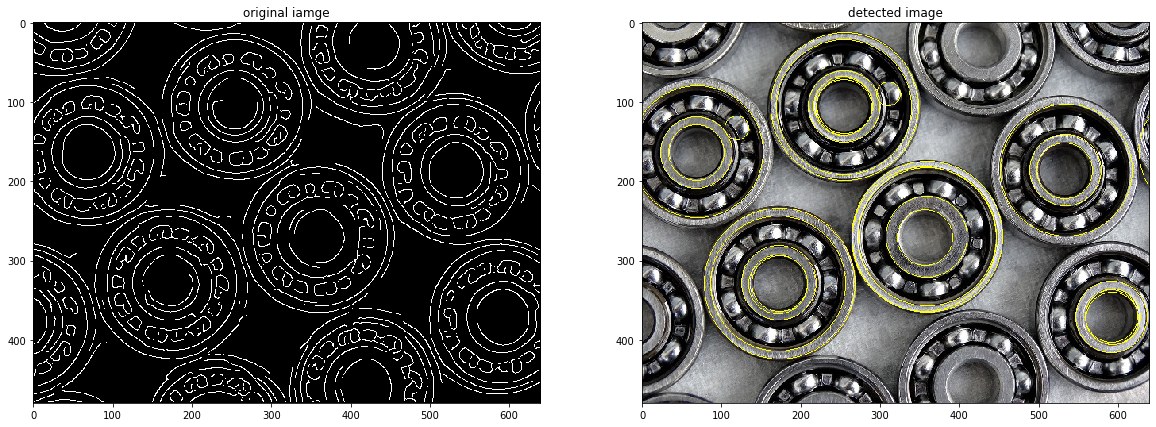

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,color,draw,transform,feature,util,filters
from skimage import io
import skimage.transform as st
from skimage.color import *


img = io.imread("./test/ball-bearings.jpg")
im = rgb2gray(img)
image = filters.gaussian(im)

edges =feature.canny(image, sigma=3.0) #检测canny边缘

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20, 15))

ax0.imshow(edges, cmap=plt.cm.gray)  #显示canny边缘
ax0.set_title('original iamge')

hough_radii = np.arange(15, 120, 2)  #半径范围
hough_res =transform.hough_circle(edges, hough_radii)  #圆变换   hough_res[0] #表示半径,之后表示width 和 height of 圆心

    

centers = []  #保存中心点坐标
accums = []   #累积值 it is the prop
radii = []    #半径

for radius, h in zip(hough_radii, hough_res):#(55,55每个半径对应每个位置为圆心的概率)

    
    peaks =feature.peak_local_max(h,threshold_abs=0.4) #取出峰值是一个坐标，这个半径可能的圆心集合，大小为num_peaks个
    centers.extend(peaks) # add the center 坐标 # 大小为num_peaks个
    accums.extend(h[peaks[:, 0], peaks[:, 1]]) #大小为num_peaks个为概率
    radii.extend([radius] * len(peaks))#####大小为num_peaks个相同的半径
    
#三个list总大小为num_peaks * 55 
#######################################################    改

#############################################################
#画出

count = 0 
for idx in np.argsort(accums)[::-1][:]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy =draw.circle_perimeter(center_y, center_x, radius)
    
    img[cy, cx] = (255,255,0)
    count+=1
print("the number of objects is : ",count)

ax1.imshow(img)
ax1.set_title('detected image')

In [5]:
import numpy as np
from skimage import io
import skimage.transform as st
from skimage.color import *
from matplotlib import pyplot as plt

In [14]:
img = io.imread("./test/ball-bearings.jpg")


In [ ]:
img = np.zeros((250, 250,3), dtype=np.uint8)
rr, cc = draw.circle_perimeter(60, 60, 50)  #以半径50画一个圆
rr1, cc1 = draw.circle_perimeter(150, 150, 60) #以半径60画一个圆
img[cc, rr,:] =255
img[cc1, rr1,:] =255

Text(0.5, 1.0, 'detected image')

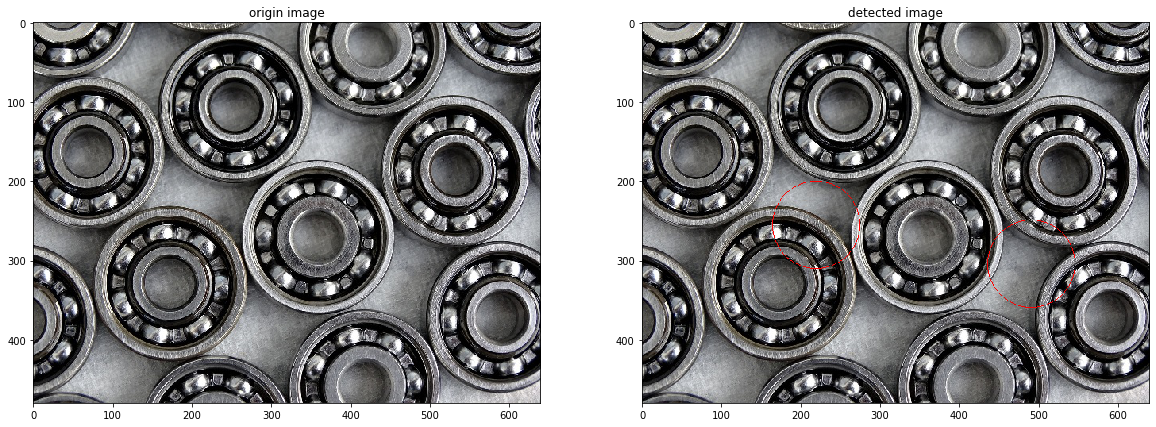

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import draw,transform,feature



fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20, 15))

ax0.imshow(img)  #显示原图
ax0.set_title('origin image')

hough_radii = np.arange(10, 80, 5)  #半径范围
hough_res =transform.hough_circle(img[:,:,0], hough_radii)  #圆变换 

centers = []  #保存所有圆心点坐标
accums = []   #累积值
radii = []    #半径

for radius, h in zip(hough_radii, hough_res):
    #每一个半径值，取出其中两个圆
    num_peaks = 2
    peaks =feature.peak_local_max(h, num_peaks=num_peaks) #取出峰值
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)

#画出最接近的圆
image =np.copy(img)
for idx in np.argsort(accums)[::-1][:2]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy =draw.circle_perimeter(center_y, center_x, radius)
    image[cy, cx] =(255,0,0)

ax1.imshow(image)
ax1.set_title('detected image')

IndexError: list index out of range

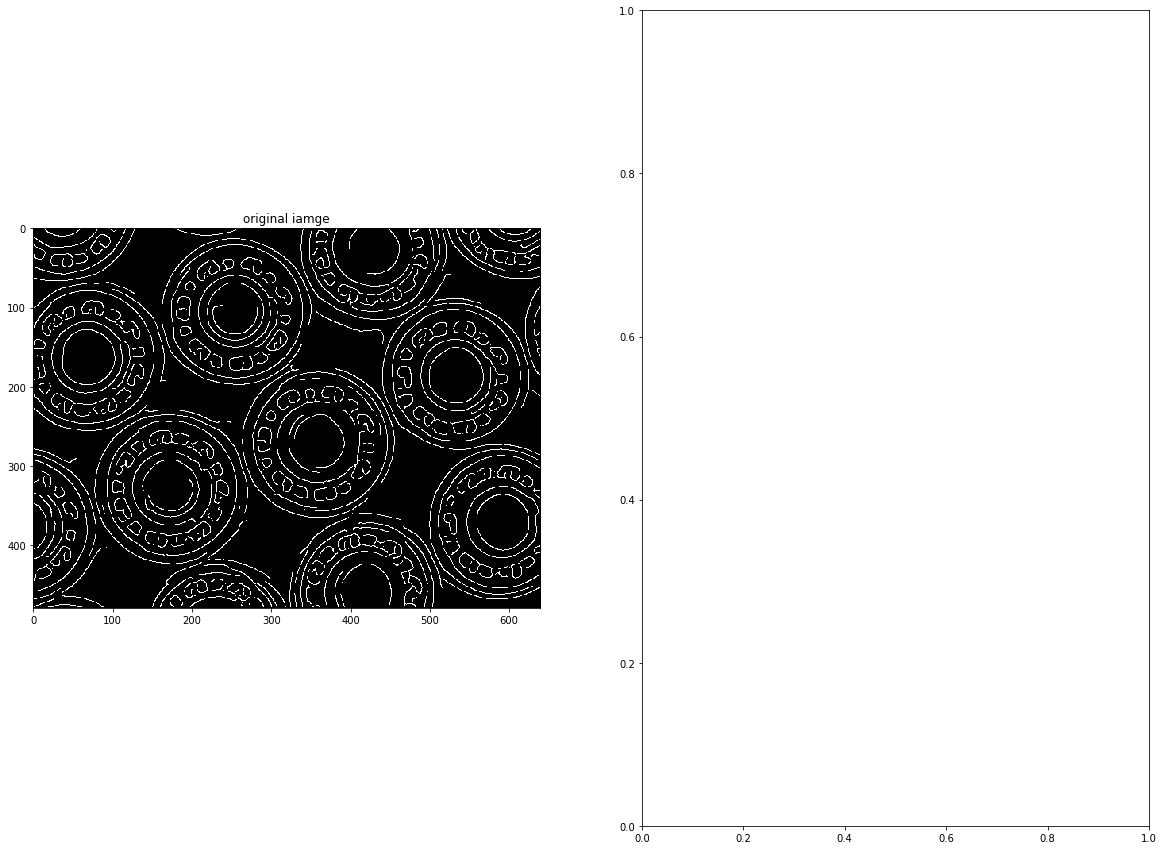

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color,draw,transform,feature,util,filters

img = io.imread("./test/ball-bearings.jpg")
im = rgb2gray(img)
image = filters.gaussian(im)

edges =feature.canny(image, sigma=3.0) #检测canny边缘

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20, 15))

ax0.imshow(edges, cmap=plt.cm.gray)  #显示canny边缘
ax0.set_title('original iamge')

hough_radii = np.arange(10, 120, 2)  #半径范围
hough_res =transform.hough_circle(edges, hough_radii)  #圆变换   hough_res[0] #表示半径
count =0
for i in range(hough_res[0].shape[0]):
    for j in range(hough_res[0].shape[1]):
        if hough_res[0][i,j]>0.45:
            count+=1

    

centers = []  #保存中心点坐标
accums = []   #累积值 it is the prop
radii = []    #半径

for radius, h in zip(hough_radii, hough_res):
    #每一个半径值，取出其中两个圆
    num_peaks = count
    peaks =feature.peak_local_max(h,num_peaks) #取出峰值
    centers.extend(peaks) # add the center
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)#######################
    
    
#######################################################    改

#############################################################
#画出最接近的5个圆


for idx in np.argsort(accums):
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy =draw.circle_perimeter(center_y, center_x, radius)
    img[cy, cx] = (100,255,255)

ax1.imshow(img)
ax1.set_title('detected image')


# 实验（可能成果）

KeyboardInterrupt: 

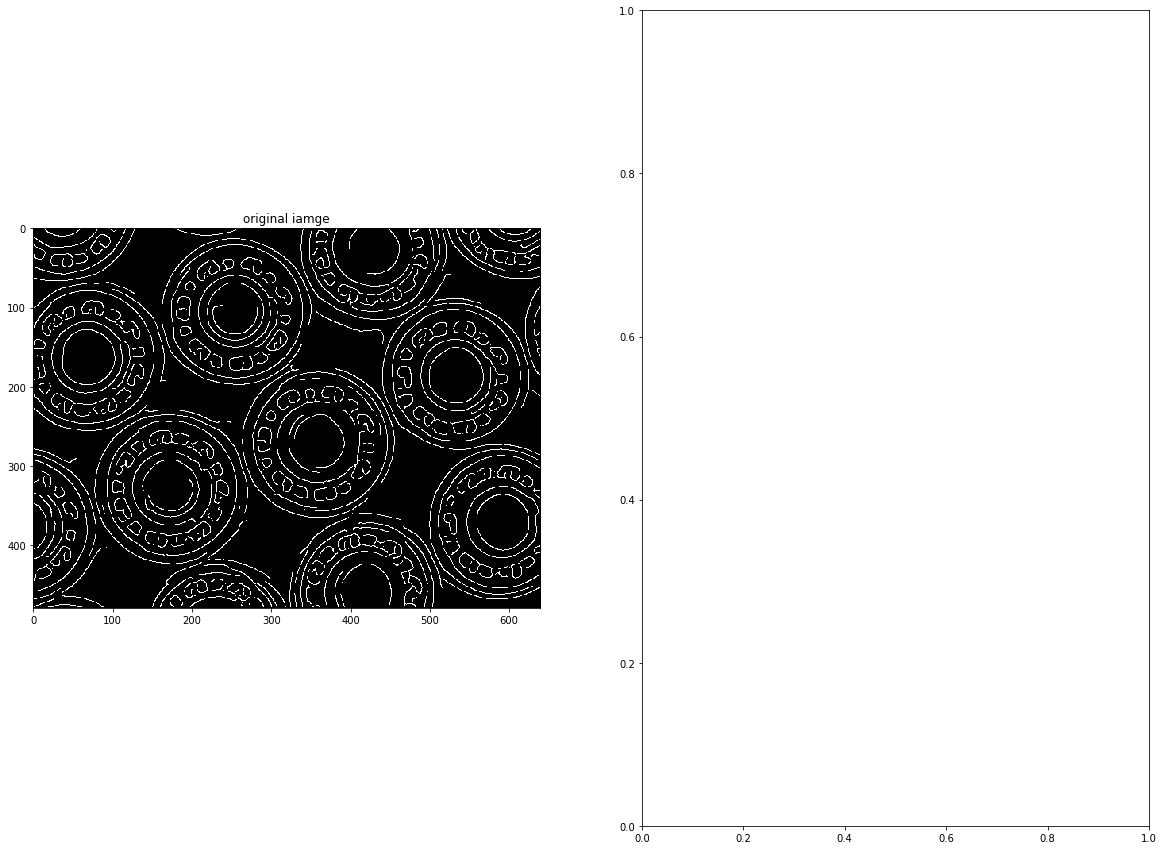

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color,draw,transform,feature,util,filters

img = io.imread("./test/ball-bearings.jpg")
im = rgb2gray(img)
image = filters.gaussian(im)

edges =feature.canny(image, sigma=3.0) #检测canny边缘

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20, 15))

ax0.imshow(edges, cmap=plt.cm.gray)  #显示canny边缘
ax0.set_title('original iamge')

hough_radii = np.arange(10, 120, 2)  #半径范围
hough_res =transform.hough_circle(edges, hough_radii)  #圆变换   hough_res[0] #表示半径,之后表示width 和 height of 圆心

    

centers = []  #保存中心点坐标
accums = []   #累积值 it is the prop
radii = []    #半径

for radius, h in zip(hough_radii, hough_res):#(55,55每个半径对应每个位置为圆心的概率)

    
    peaks =feature.peak_local_max(h,threshold_abs=0.14) #取出峰值是一个坐标，这个半径可能的圆心集合，大小为num_peaks个
    centers.extend(peaks) # add the center 坐标 # 大小为num_peaks个
    accums.extend(h[peaks[:, 0], peaks[:, 1]]) #大小为num_peaks个为概率
    radii.extend([radius] * len(peaks))#####大小为num_peaks个相同的半径
    
#三个list总大小为num_peaks * 55 
#######################################################    改

#############################################################
#画出


for idx in range(len(centers)):
    center_y, center_x = centers[idx]
    radius = radii[idx]
    cx, cy=draw.circle_perimeter(center_y, center_x, radius) #return a set of values to draw circle
    for i in cy:
        for j in cx:
            if i<480 and j<640:
                img[i, j] = (100,255,255)

ax1.imshow(img)
ax1.set_title('detected image')


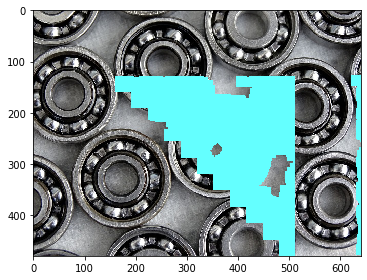

In [256]:
for i in cy:
        for j in cx:
            if i<480 and j<640:
                img[i, j] = (100,255,255)
io.imshow(img)

In [249]:
help(draw.circle_perimeter)
   

Help on function circle_perimeter in module skimage.draw.draw:

circle_perimeter(r, c, radius, method='bresenham', shape=None)
    Generate circle perimeter coordinates.
    
    Parameters
    ----------
    r, c : int
        Centre coordinate of circle.
    radius: int
        Radius of circle.
    method : {'bresenham', 'andres'}, optional
        bresenham : Bresenham method (default)
        andres : Andres method
    shape : tuple, optional
        Image shape which is used to determine the maximum extent of output
        pixel coordinates. This is useful for circles that exceed the image
        size. If None, the full extent of the circle is used.  Must be at least
        length 2. Only the first two values are used to determine the extent of
        the input image.
    
    Returns
    -------
    rr, cc : (N,) ndarray of int
        Bresenham and Andres' method:
        Indices of pixels that belong to the circle perimeter.
        May be used to directly index into an ar

In [244]:
peaks =feature.peak_local_max(h,threshold_abs=0.14)
peaks


array([[363, 236],
       [362, 236],
       [356, 152],
       [354, 168],
       [352, 162],
       [350, 145],
       [349, 317],
       [349, 253],
       [348, 170],
       [348, 169],
       [347, 187],
       [339, 139],
       [330, 342],
       [330, 296],
       [329, 518],
       [329, 211],
       [328, 496],
       [327, 211],
       [324, 138],
       [323, 387],
       [309, 441],
       [307, 240],
       [305, 172],
       [304, 149],
       [298, 421],
       [297, 343],
       [297, 191],
       [293, 337],
       [289, 391],
       [286, 392],
       [285, 161],
       [281, 416],
       [281, 338],
       [272, 192],
       [271, 320],
       [271, 189],
       [268, 328],
       [264, 381],
       [264, 293],
       [263, 337],
       [253, 333],
       [253, 210],
       [252, 204],
       [247, 362],
       [245, 208],
       [237, 372],
       [234, 350],
       [229, 339],
       [223, 325],
       [217, 383],
       [214, 526],
       [214, 352],
       [213,

In [241]:
len(hough_res)
len(   #累积值 it is the prop
peaks     #累积值 it is the prop
  ) #保存中心点坐标


13

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color,draw,transform,feature,util,filters

img = io.imread("./test/ball-bearings.jpg")
grayscale = rgb2gray(img)
gauss = filters.gaussian(grayscale)



In [135]:
# Melakukan binary thresholding dengan menggunakan metode otsu
t = filters.threshold_otsu(gauss)
mask = gauss < t

# Untuk melihat hasil dari thresholding 
sel = np.zeros_like(img)
sel[mask] = img[mask]
edge =feature.canny(mask, sigma=3.0) #检测canny边缘

110183


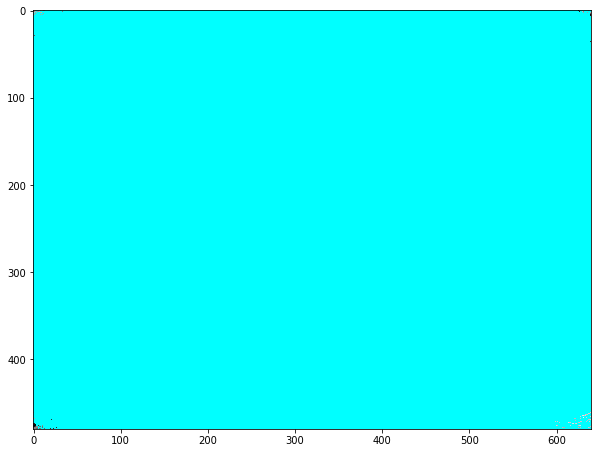

In [131]:
hough_radii = np.arange(10,120,2)
hough_res = transform.hough_circle(edge,hough_radii)
accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii)

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,15))
count = 0
for center_y, center_x, radius in zip(cy,cx,radii):
    
    circy, circx = draw.circle_perimeter(center_y, center_x, radius,shape=edge.shape)
    img[circy,circx] = (0,255,255)
    count = count + 1
  
print(count)
ax.imshow(img)
plt.show()

In [140]:
accums[0]

0.671875

In [130]:
cy

array([ 84, 163, 187, 302, 105])